 Using the same script as unsupervised clustering assignment  to load and create structural data

In [373]:
from code_from_cluster_assignment import (
    load_clinical_data,
    load_gene_expression_data,
    create_data_structures_with_matching_sample,
    encode_estrogen_receptor,
    get_std,
    plot_std_histogram)

In [374]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [375]:
genes_expression     = load_gene_expression_data("BRCA.exp.348.med.txt")
genes_expression.head()

,NAME,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
0,TCGA-A1-A0SH-01A-11R-A084-07,0.162208,1.33800,0.044063,0.24950,1.843833,0.18450,0.642083,-0.05300,-0.507687,...,-0.21375,0.045917,0.00950,-0.222833,0.5763,0.248875,0.0284,-0.2334,-0.61725,-0.46325
1,TCGA-A1-A0SJ-01A-11R-A084-07,0.577708,-0.48350,-0.258062,0.68225,-0.531000,0.12750,0.472583,-0.02500,-0.452313,...,-0.37075,0.502583,0.27875,0.674333,-0.0781,0.736625,2.6238,0.2950,2.05025,-0.44335
2,TCGA-A1-A0SK-01A-12R-A084-07,1.113042,-1.55850,0.119813,0.86775,-1.674833,-0.84375,-1.109917,0.73075,0.202813,...,-1.08450,-0.622083,0.16200,0.139667,0.6228,-0.260625,-0.9017,-0.0323,-0.56825,-0.33125
3,TCGA-A1-A0SO-01A-22R-A084-07,-0.375208,-1.62875,-0.542063,-0.13975,-1.838167,-0.36375,-0.685917,-0.19675,-0.555562,...,-0.04900,-0.165917,0.10250,1.493333,-0.2751,-0.426125,-1.9603,0.5177,-0.52225,-0.26135
4,TCGA-A2-A04N-01A-11R-A115-07,-0.785292,0.26300,0.131688,0.45775,0.141333,0.26225,0.037917,0.40650,0.571937,...,0.34200,-0.223417,-0.11150,-0.429667,-0.9936,-0.747375,0.6105,0.6075,-0.54325,0.10965


In [376]:
estrogen_receptor    = load_clinical_data("clinical_data.xlsx")
estrogen_receptor

,Complete TCGA ID,ER Status,AJCC Stage
0,TCGA-A2-A0T2,Negative,Stage IV
1,TCGA-A2-A04P,Negative,Stage IIIC
2,TCGA-A1-A0SK,Negative,Stage IIA
3,TCGA-A2-A0CM,Negative,Stage IIA
4,TCGA-AR-A1AR,Negative,Stage III
...,...,...,...
798,TCGA-EW-A1PD,Positive,Stage IIA
799,TCGA-EW-A1PE,Positive,Stage IIA
800,TCGA-EW-A1PF,Positive,Stage IA
801,TCGA-EW-A1PG,Positive,Stage IIB


In [377]:
estrogen_receptor    = encode_estrogen_receptor(estrogen_receptor)
estrogen_receptor.head()

,Complete TCGA ID,ER Status,AJCC Stage
0,TCGA-A2-A0T2,1,Stage IV
1,TCGA-A2-A04P,1,Stage IIIC
2,TCGA-A1-A0SK,1,Stage IIA
3,TCGA-A2-A0CM,1,Stage IIA
4,TCGA-AR-A1AR,1,Stage III


In [378]:
genes_expression, estrogen_receptor  = create_data_structures_with_matching_sample(genes_expression, estrogen_receptor)
genes_expression.head()


,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,0.094042,-0.16075,-0.023937,-0.91000,-0.607667,0.64950,0.032583,-0.37500,-1.286938,0.6375,...,-0.00425,0.819917,0.31175,-0.171833,-0.0101,-1.225625,-1.3221,0.1507,-1.01425,-0.34315
TCGA-A2-A04P,-1.247042,0.04525,0.027812,-1.80175,-1.158000,3.24800,-0.032250,0.36275,-0.047313,0.6765,...,0.60000,-0.579083,0.26800,-0.193167,0.9367,-1.610625,-4.1867,0.4112,0.54175,0.67245
TCGA-A1-A0SK,1.113042,-1.55850,0.119813,0.86775,-1.674833,-0.84375,-1.109917,0.73075,0.202813,-0.4860,...,-1.08450,-0.622083,0.16200,0.139667,0.6228,-0.260625,-0.9017,-0.0323,-0.56825,-0.33125
TCGA-A2-A0CM,-0.178375,-0.61400,-0.087437,0.07325,-0.044000,-0.11800,-0.249417,-0.75825,-2.402830,0.0260,...,2.11875,-0.629917,0.22875,-0.449500,-0.0752,-0.582875,-2.6926,0.3203,-0.84775,0.45355
TCGA-B6-A0WX,-0.543958,0.35000,-0.288312,0.00125,1.151833,1.06525,-0.033750,-0.18400,-1.511813,-0.0085,...,0.28750,0.104750,-0.01025,0.703833,-0.6255,-0.593625,-1.2700,-0.4628,0.19875,-0.56215


In [379]:
estrogen_receptor.head()

,Complete TCGA ID,ER Status,AJCC Stage
0,TCGA-A2-A0T2,1,Stage IV
1,TCGA-A2-A04P,1,Stage IIIC
2,TCGA-A1-A0SK,1,Stage IIA
3,TCGA-A2-A0CM,1,Stage IIA
5,TCGA-B6-A0WX,1,Stage IIIA


##### Task 1

Compute two-sample t-statistics for differential expression of each gene between ER positive and ER negative groups

First we need to get the the gene expression lelves for ER positive vs ER negative breast tumours.

In [380]:


#
filter_pos =(estrogen_receptor["ER Status"]==0)
filter_neg =(estrogen_receptor["ER Status"]==1)
filter
ER_positive = genes_expression[filter_pos.to_list()]
ER_negative = genes_expression[filter_neg.to_list()]
ER_positive
n1 =len(ER_positive)
n2 = len(ER_negative)
n= n1+n2

In [381]:
ER_negative

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,0.094042,-0.16075,-0.023937,-0.91000,-0.607667,0.64950,0.032583,-0.37500,-1.286938,0.6375,...,-0.00425,0.819917,0.31175,-0.171833,-0.0101,-1.225625,-1.3221,0.1507,-1.01425,-0.34315
TCGA-A2-A04P,-1.247042,0.04525,0.027812,-1.80175,-1.158000,3.24800,-0.032250,0.36275,-0.047313,0.6765,...,0.60000,-0.579083,0.26800,-0.193167,0.9367,-1.610625,-4.1867,0.4112,0.54175,0.67245
TCGA-A1-A0SK,1.113042,-1.55850,0.119813,0.86775,-1.674833,-0.84375,-1.109917,0.73075,0.202813,-0.4860,...,-1.08450,-0.622083,0.16200,0.139667,0.6228,-0.260625,-0.9017,-0.0323,-0.56825,-0.33125
TCGA-A2-A0CM,-0.178375,-0.61400,-0.087437,0.07325,-0.044000,-0.11800,-0.249417,-0.75825,-2.402830,0.0260,...,2.11875,-0.629917,0.22875,-0.449500,-0.0752,-0.582875,-2.6926,0.3203,-0.84775,0.45355
TCGA-B6-A0WX,-0.543958,0.35000,-0.288312,0.00125,1.151833,1.06525,-0.033750,-0.18400,-1.511813,-0.0085,...,0.28750,0.104750,-0.01025,0.703833,-0.6255,-0.593625,-1.2700,-0.4628,0.19875,-0.56215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A1-A0SH,0.162208,1.33800,0.044063,0.24950,1.843833,0.18450,0.642083,-0.05300,-0.507687,-0.1300,...,-0.21375,0.045917,0.00950,-0.222833,0.5763,0.248875,0.0284,-0.2334,-0.61725,-0.46325
TCGA-AN-A0XN,0.295542,0.71450,0.561438,0.32150,1.541500,0.73300,0.097917,-0.45575,-0.856402,0.0440,...,0.60625,0.576250,-0.07750,0.653500,-0.0031,0.382625,-0.5704,-0.3336,-0.43125,0.50725
TCGA-AN-A0XS,-0.445375,-0.20425,0.260563,0.36675,0.753833,0.07650,0.675417,0.37050,1.800313,0.2945,...,0.02500,0.193750,-0.03175,-0.216333,-0.4052,0.572125,0.4658,0.0065,1.59725,0.16615


Compute the average expression level for the gene in each group

In [466]:
def calculate_t_statistics(ER_positive,ER_negative):
    x1_bar = ER_positive.mean(axis=0)
    x2_bar = ER_negative.mean(axis=0)

    s1_squred = ER_positive.var(axis=0)
    s2_squred = ER_negative.var(axis=0)

    se = (s1_squred/n1 +s2_squred/n2)**0.5

    t = (x1_bar + x2_bar)/se

    return t


In [383]:
t = calculate_t_statistics(ER_positive=ER_positive,ER_negative=ER_negative)
t

ELMO2     -1.951975
CREB3L1   -1.884864
RPS11      0.736475
PNMA1     -4.035901
MMP2      -1.405241
             ...   
PIK3IP1   -4.609556
SLC39A6   -6.270528
SNRPD2     1.826212
AQP7       3.839264
CTSC       4.110491
Length: 17373, dtype: float64

##### Task 2: 

Compute theoretical and empirical p-values for each gene (use the permutation procedure from Remark C in the paper).

In [384]:
B= 100

t0b =[]
for b in np.arange(B):
    permutated = genes_expression.sample(frac=1, axis=0)
    group1 = permutated[:n1]
    group2 = permutated[n1:]
    t0b.append((calculate_t_statistics(group1,group2).abs()>=t.abs()).astype(int))
pvalues_empirical=pd.concat(t0b,axis=1).sum(axis=1)/(len(t)*B)
    
   

        
   


    

In [385]:
from scipy import stats
pvalues_theoretical  = stats.t.sf(np.abs(t.values), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)

In [386]:
import plotly.express as px
def plot_pvalue_histograms(pvalues):
 
    # Here we use a column with categorical data
    fig = px.histogram(pvalues, nbins=50)

    fig.show()

plot_pvalue_histograms(pvalues=pvalues_empirical)
plot_pvalue_histograms(pvalues=pvalues_theoretical)

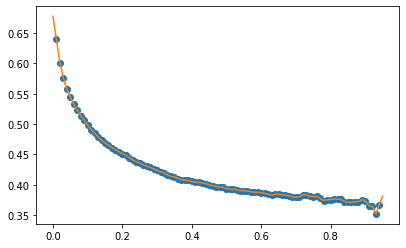

In [418]:
import numpy as np

from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt

sorted_pvalue = np.sort(pvalues_theoretical)
def pi0_func(l):
    m=len(sorted_pvalue)
    return sum(sorted_pvalue>l)/(m*(1-l))

pi0 =[] 
lambda_=np.arange(0.01,0.95,0.01)  
for l in lambda_:
    pi0.append(pi0_func(l))


f =CubicSpline(x=lambda_,y=pi0,bc_type='natural')
x = np.linspace(0,.95,100)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(lambda_,pi0, 'o', label='data')
ax.plot(x, f(x), label="S")
# ax.set_xlim(0,1)
# ax.set_xlabel("$\lambda$")
def q(p0,p):
    m=len(p)
    qpm = p0*p[-1]
    q =[]
    for i in reversed(range(1,m)):
        qpi=min((p0*m*p[i])/i,qpm)
        q.append(qpi)
        qpm = qpi
    q.insert(-1,qpm)
    return q
        



In [420]:
p0=f(0.95)
qvalue=q(p0=p0,p=sorted_pvalue)
p0

array(0.38099624)

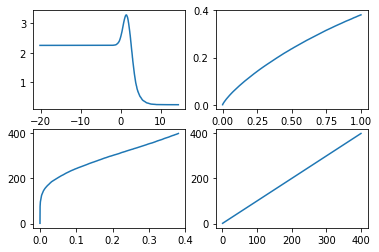

In [465]:
from scipy.stats import norm
fig, axs = plt.subplots(2, 2)
S =np.linspace(1,400,len(qvalue))
F =np.linspace(1,400,len(qvalue))
qvalue.sort()

pdf = norm.pdf(qvalue,np.mean(qvalue),np.std(qvalue))
axs[0,0].plot(t.values,pdf)
axs[0,1].plot(sorted_pvalue,sorted(qvalue))
axs[1,0].plot(sorted(qvalue),S)
axs[1,1].plot(S,F)




